<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multivariate_Time_Series_Modeling_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries
---

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import scipy
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import pandas as pd
import numpy as np
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

**Save-Load-Retrain**
---

In [ ]:
# saving the model in tensorflow format
#model1.save('./MyModellstm_tf',save_format='tf')
# loading the saved model
loaded_model1 = tf.keras.models.load_model('./MyModel_LSTM_tf')
# saving the model in tensorflow format
#model2.save('./MyModelgru_tf',save_format='tf')
# loading the saved model
loaded_model = tf.keras.models.load_model('./MyModelhyb_tf')
# saving the model in tensorflow format
#model3.save('./MyModelbilstm_tf',save_format='tf')
# loading the saved model
loaded_model2 = tf.keras.models.load_model('./MyModelBI_tf')

**Check the performance**
---

In [ ]:
df20 = pd.read_csv('Monitoring_2020_2022.csv')
df20

,Unnamed: 0.1,Unnamed: 0,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,Date_time,TS1_P1_data,Wx,Wy
0,0,24429,86,1006,33,29,976,1/7/2020 13:23,1011,-6.251925,-6.474058
1,1,24430,86,1006,33,29,972,1/7/2020 13:24,1009,-7.360437,-8.174593
2,2,24431,86,1006,34,29,974,1/7/2020 13:25,1010,-2.699413,-11.692441
3,3,24432,87,1006,33,29,972,1/7/2020 13:26,1019,-0.899804,-3.897480
4,4,24433,87,1006,33,29,972,1/7/2020 13:27,1020,-3.942047,-10.269385
...,...,...,...,...,...,...,...,...,...,...,...
484083,484083,18175,17,1016,79,16,7,10/9/2022 18:16,19,-11.583085,-5.901876
484084,484084,18176,17,1016,79,16,5,10/9/2022 18:17,21,-10.269385,-3.942047
484085,484085,18177,17,1016,79,16,5,10/9/2022 18:18,16,-9.455186,-3.255682
484086,484086,18178,17,1016,79,16,5,10/9/2022 18:19,14,-10.864572,1.720779


In [ ]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484088 entries, 0 to 484087
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0.1                 484088 non-null  int64  
 1   Unnamed: 0                   484088 non-null  int64  
 2   TS1_SENS0700_TmpMdul_C_data  484088 non-null  int64  
 3   Barometer_data               484088 non-null  int64  
 4   Outside_Humidity_data        484088 non-null  int64  
 5   Outside_Temperature_data     484088 non-null  int64  
 6   Solar_Radiation_data         484088 non-null  int64  
 7   Date_time                    484088 non-null  object 
 8   TS1_P1_data                  484088 non-null  int64  
 9   Wx                           484088 non-null  float64
 10  Wy                           484088 non-null  float64
dtypes: float64(2), int64(8), object(1)
memory usage: 40.6+ MB


In [ ]:
df20['Date_time_name'] = df20['Date_time']

In [ ]:
df20['Date_time'] = pd.to_datetime(df20['Date_time'], infer_datetime_format=True)

array([<Axes: xlabel='Date_time'>, <Axes: xlabel='Date_time'>,
       <Axes: xlabel='Date_time'>, <Axes: xlabel='Date_time'>],
      dtype=object)

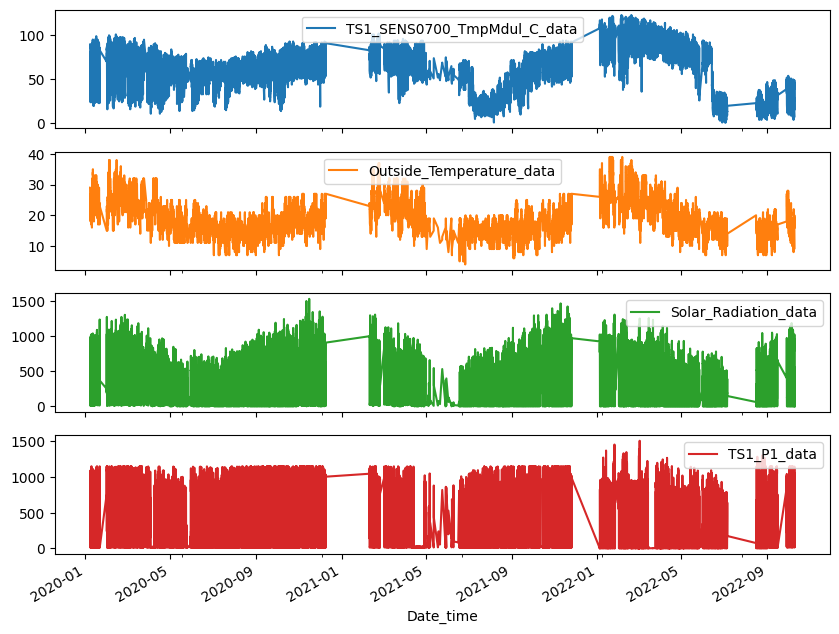

In [ ]:
#df20.set_index('Date_time')[['TS1_SENS0700_TmpMdul_C_data', 'Outside_Temperature_data','Solar_Radiation_data','TS1_P1_data']].plot(subplots=True)

In [ ]:
df20.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'TS1_SENS0700_TmpMdul_C_data',
       'Barometer_data', 'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data', 'Date_time', 'TS1_P1_data', 'Wx', 'Wy',
       'Date_time_name'],
      dtype='object')

In [ ]:
date_time = pd.to_datetime(df20.pop('Date_time'), format='%d/%m/%Y %H:%M')
date_time

0        2020-01-07 13:23:00
1        2020-01-07 13:24:00
2        2020-01-07 13:25:00
3        2020-01-07 13:26:00
4        2020-01-07 13:27:00
                 ...        
484083   2022-10-09 18:16:00
484084   2022-10-09 18:17:00
484085   2022-10-09 18:18:00
484086   2022-10-09 18:19:00
484087   2022-10-09 18:20:00
Name: Date_time, Length: 484088, dtype: datetime64[ns]

In [ ]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [ ]:
import numpy as np
day = 24*60*1
year = (365.2425)*day

df20['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df20['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df20['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df20['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [ ]:
df20.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'TS1_SENS0700_TmpMdul_C_data',
       'Barometer_data', 'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data', 'TS1_P1_data', 'Wx', 'Wy', 'Date_time_name',
       'Day sin', 'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

In [ ]:
df20_new = df20.set_index(date_time)           # Applying the set_index method
print(df20_new)  

                     Unnamed: 0.1  Unnamed: 0  TS1_SENS0700_TmpMdul_C_data  \
Date_time                                                                    
2020-01-07 13:23:00             0       24429                           86   
2020-01-07 13:24:00             1       24430                           86   
2020-01-07 13:25:00             2       24431                           86   
2020-01-07 13:26:00             3       24432                           87   
2020-01-07 13:27:00             4       24433                           87   
...                           ...         ...                          ...   
2022-10-09 18:16:00        484083       18175                           17   
2022-10-09 18:17:00        484084       18176                           17   
2022-10-09 18:18:00        484085       18177                           17   
2022-10-09 18:19:00        484086       18178                           17   
2022-10-09 18:20:00        484087       18179                   

In [ ]:
df20.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'TS1_SENS0700_TmpMdul_C_data',
       'Barometer_data', 'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data', 'TS1_P1_data', 'Wx', 'Wy', 'Date_time_name',
       'Day sin', 'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

In [ ]:
df20_new = df20_new.loc[df20_new['TS1_P1_data']<=1150]

In [ ]:
df20_new = df20_new.loc[df20_new['TS1_P1_data']>50]

In [ ]:
df20_new.shape

(404274, 15)

In [ ]:
df20input =df20_new[['TS1_P1_data','TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data','Wx','Wy', 'Day sin','Day cos','Year sin', 'Year cos']]

In [ ]:
df20input.shape

(404274, 12)

In [ ]:
df20input.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
TS1_P1_data,-0.311448,-1.341416
TS1_SENS0700_TmpMdul_C_data,-0.322973,-0.465776
Barometer_data,0.252048,-0.258193
Outside_Humidity_data,-0.066907,-0.403854
Outside_Temperature_data,0.599407,0.148147
Solar_Radiation_data,0.475425,-0.786312
Wx,0.202014,1.327954
Wy,-0.265063,0.915246
Day sin,0.001006,-1.499921
Day cos,0.001469,-1.500082


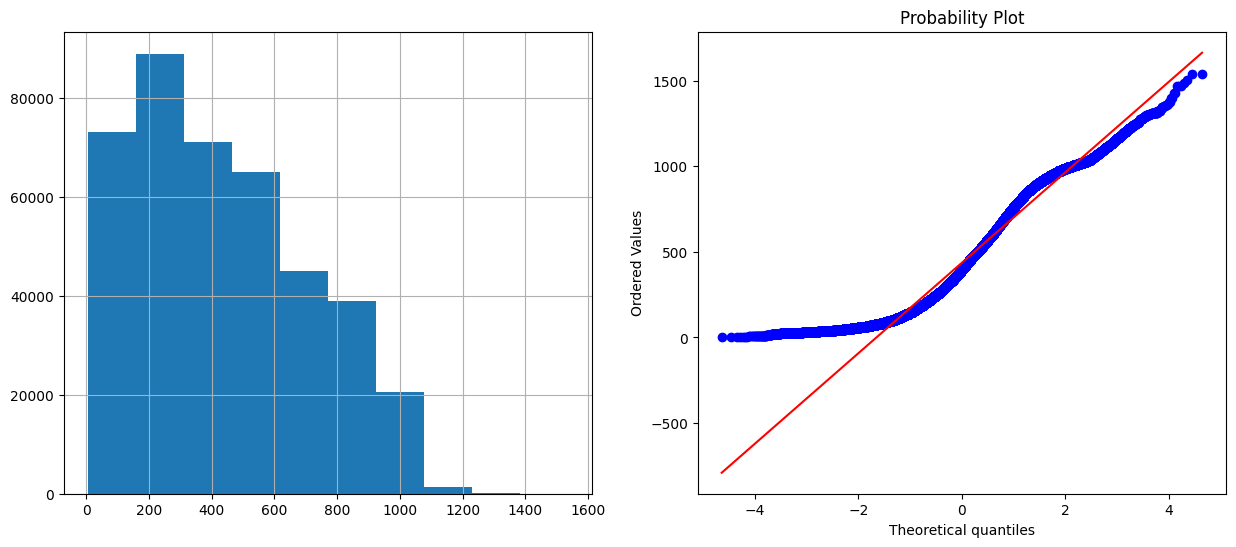

In [ ]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()
diagnostic_plots(df20input,'Solar_Radiation_data')

<ipython-input-21-f72d55257ef7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20input['Solar_Radiation_data_SQ']=df20input.Solar_Radiation_data**(1/2)


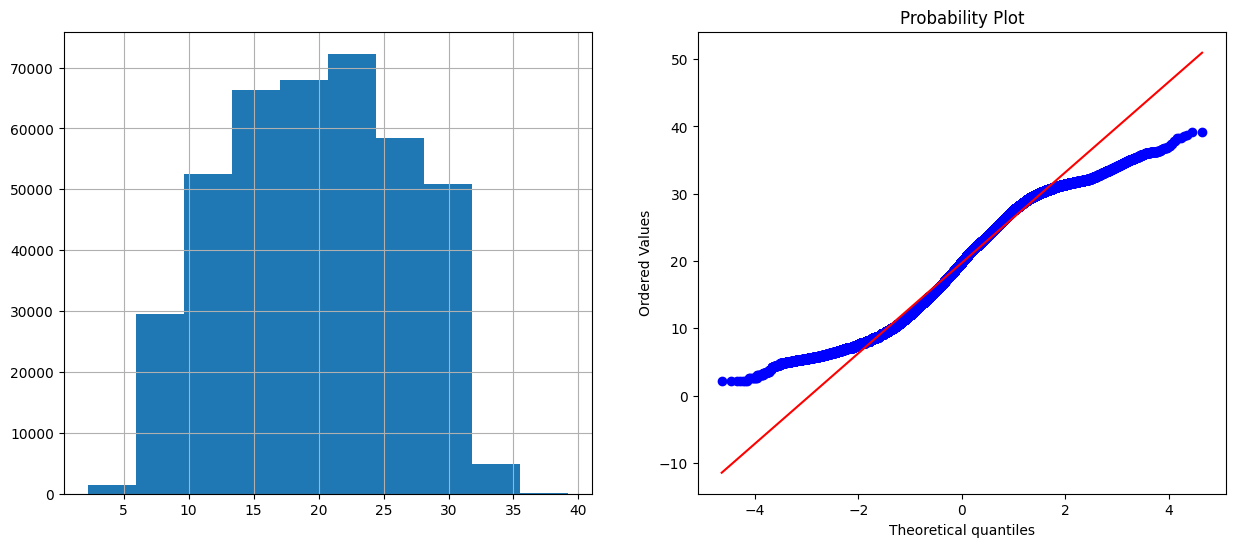

In [ ]:
df20input['Solar_Radiation_data_SQ']=df20input.Solar_Radiation_data**(1/2)
diagnostic_plots(df20input,'Solar_Radiation_data_SQ')

In [ ]:
df20input =df20input[['TS1_P1_data','TS1_SENS0700_TmpMdul_C_data','Barometer_data','Outside_Humidity_data',
                    'Outside_Temperature_data','Solar_Radiation_data_SQ','Wx','Wy',
                    'Day sin','Day cos','Year sin', 'Year cos']]

In [ ]:
df20input

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data_SQ,Wx,Wy,Day sin,Day cos,Year sin,Year cos
Date_time,,,,,,,,,,,,
2020-01-07 13:23:00,1011,86,1006,33,29,31.240999,-6.251925,-6.474058,2.588190e-01,-0.965926,0.348874,0.937169
2020-01-07 13:24:00,1009,86,1006,33,29,31.176915,-7.360437,-8.174593,1.293434e-11,-1.000000,0.349546,0.936919
2020-01-07 13:25:00,1010,86,1006,34,29,31.208973,-2.699413,-11.692441,-2.588190e-01,-0.965926,0.350218,0.936668
2020-01-07 13:26:00,1019,87,1006,33,29,31.176915,-0.899804,-3.897480,-5.000000e-01,-0.866025,0.350889,0.936417
2020-01-07 13:27:00,1020,87,1006,33,29,31.176915,-3.942047,-10.269385,-7.071068e-01,-0.707107,0.351560,0.936165
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-09 17:21:00,62,19,1015,74,17,7.745967,-1.805445,-2.395907,7.071068e-01,-0.707107,0.830820,-0.556541
2022-10-09 17:22:00,60,19,1015,74,17,7.874008,-2.516012,-1.633917,5.000000e-01,-0.866025,0.830421,-0.557136
2022-10-09 17:23:00,61,19,1015,74,17,7.874008,-12.613844,-3.144985,2.588190e-01,-0.965926,0.830021,-0.557731


In [ ]:
df20input=df20input[::2]
df20input.shape
dfq1=df20input[:17500]
dfq2=df20input[17500:35000]
dfq3=df20input[35000:52500]
dfq4=df20input[52500:70000]
dfq5=df20input[70000:87500]
dfq6=df20input[87500:105000]
dfq7=df20input[105000:122500]
dfq8=df20input[122500]:140000]
dfq9=df20input[140000:157500]
dfq10=df20input[157500:175000]
dfq11=df20input[192500:200000]
dfq12=df20input[200000:]

(202137, 12)

In [ ]:
#dfq1=df20input[:15000]
#dfq2=df20input[15000:30000]
#dfq3=df20input[30000:45000]
#dfq4=df20input[45000:60000]
#dfq5=df20input[60000:75000]
#dfq6=df20input[75000:90000]
#dfq7=df20input[90000:105000]
#dfq8=df20input[105000:120000]
#dfq9=df20input[120000:135000]
#dfq10=df20input[135000:150000]
#dfq11=df20input[150000:165000]
#dfq12=df20input[165000:]
#dfq13=df20input[180000:195000]

In [ ]:
print(dfq1.shape)
print(dfq2.shape)
print(dfq3.shape)
print(dfq4.shape)
print(dfq5.shape)
print(dfq6.shape)
print(dfq7.shape)
print(dfq8.shape)
print(dfq9.shape)
print(dfq10.shape)
print(dfq11.shape)
print(dfq12.shape)
#print(dfq13.shape)

(15000, 12)
(15000, 12)
(15000, 12)
(15000, 12)
(15000, 12)
(15000, 12)
(15000, 12)
(15000, 12)
(15000, 12)
(15000, 12)
(15000, 12)
(15000, 12)
(15000, 12)


Q1
---

In [ ]:
scalerl = MinMaxScaler()
scalerg= MinMaxScaler()
data_scaledq1l= scalerl.fit_transform(dfq1)
data_scaledq1g= scalerg.fit_transform(dfq1)
featuresq1l=data_scaledq1l
targetq1l=data_scaledq1l[:,0]
featuresq1g=data_scaledq1g
targetq1g=data_scaledq1g[:,0]
#x_trainq2, x_testq2, y_trainq2, y_testq2 = train_test_split(featuresq2, targetq2, test_size=0.1, random_state=123, shuffle = False)
win_length=720
batch_size=32
num_features=12
test_generatorq1l = TimeseriesGenerator(featuresq1l ,targetq1l, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorq1g = TimeseriesGenerator(featuresq1g ,targetq1g, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq2= TimeseriesGenerator(x_testq2, y_testq2, length=win_length, sampling_rate=1, batch_size=batch_size)
###############################LSTM#####################################################
loaded_model1.evaluate_generator(test_generatorq1l, verbose=0)  
predictionsq1l=loaded_model1.predict_generator(test_generatorq1l)
predictionsq1l.shape[0]
featuresq1l[:,1:][win_length:]
df_predq1l=pd.concat([pd.DataFrame(predictionsq1l), pd.DataFrame(featuresq1l[:,1:][win_length:])],axis=1)
df_predq1l
rev_transq1l=scalerl.inverse_transform(df_predq1l)
rev_transq1l
df_finalq1l=dfq1[predictionsq1l.shape[0]*-1:]
df_finalq1l['Pred_LSTM']=rev_transq1l[:,0]
Pred_BILSTM=df_finalq1l['Pred_LSTM']
y_pred1=Pred_LSTM
y_test1=df_finalq1l['TS1_P1_data']

###############################GRU#####################################################
loaded_model.evaluate_generator(test_generatorq1g, verbose=0)  
predictionsq1g=loaded_model.predict_generator(test_generatorq1g)
predictionsq1g.shape[0]
featuresq1g[:,1:][win_length:]
df_predq1g=pd.concat([pd.DataFrame(predictionsq1g), pd.DataFrame(featuresq1g[:,1:][win_length:])],axis=1)
df_predq1g
rev_transq1g=scalerg.inverse_transform(df_predq1g)
rev_transq1g
df_finalq1g=dfq1[predictionsq1g.shape[0]*-1:]
df_finalq1g['Pred_GRU']=rev_transq1g[:,0]
Pred_GRU=df_finalq1g['Pred_GRU']
y_pred1=Pred_GRU
y_test1=df_finalq1g['TS1_P1_data']



<ipython-input-126-c271a0df48c7>:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model1.evaluate_generator(test_generatorq1l, verbose=0)
<ipython-input-126-c271a0df48c7>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq1l=loaded_model1.predict_generator(test_generatorq1l)
<ipython-input-126-c271a0df48c7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq1l['Pred_LSTM']=rev_transq1l[:,0]
<ipython-input-126-c271a0df48c7>:32: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future 

In [ ]:
Ll = df_finalq1l[['TS1_P1_data','Pred_LSTM']].copy()
G2= df_finalq1g[['Pred_GRU']].copy()
frames = [Ll,G2]
result = pd.concat(frames,axis=1)
result 

,TS1_P1_data,Pred_LSTM,Pred_GRU
Date_time,,,
2020-01-09 12:00:00,1140,1082.947845,1110.949417
2020-01-09 12:02:00,1137,1080.023941,1108.659607
2020-01-09 12:04:00,1145,1078.749073,1107.268925
2020-01-09 12:06:00,1139,1085.224620,1112.146662
2020-01-09 12:08:00,1141,1084.613388,1111.554033
...,...,...,...
2020-02-21 12:19:00,137,130.712699,110.494818
2020-02-21 12:21:00,120,116.703495,97.674604
2020-02-21 12:23:00,97,98.043630,79.457655


In [ ]:
scalerh = MinMaxScaler()
data_scaledq1h= scalerh.fit_transform(result)
featuresq1h=data_scaledq1h
targetq1h=data_scaledq1h[:,0]
#x_trainq2, x_testq2, y_trainq2, y_testq2 = train_test_split(featuresq2, targetq2, test_size=0.1, random_state=123, shuffle = False)
win_length=360
batch_size=32
num_features=12
test_generatorq1h = TimeseriesGenerator(featuresq1h ,targetq1h, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq2= TimeseriesGenerator(x_testq2, y_testq2, length=win_length, sampling_rate=1, batch_size=batch_size)
loaded_model2.evaluate_generator(test_generatorq1h, verbose=0)  
predictionsq1h=loaded_model2.predict_generator(test_generatorq1h)
predictionsq1h.shape[0]
featuresq1h[:,1:][win_length:]
df_predq1h=pd.concat([pd.DataFrame(predictionsq1h), pd.DataFrame(featuresq1h[:,1:][win_length:])],axis=1)
df_predq1h
rev_transq1h=scalerh.inverse_transform(df_predq1h)
rev_transq1h
df_finalq1h=result[predictionsq1h.shape[0]*-1:]
df_finalq1h['Pred_BILSTM']=rev_transq1h[:,0]
Pred_BILSTM=df_finalq1h['Pred_BILSTM']
y_pred1h=Pred_BILSTM
y_test1h=df_finalq1h['TS1_P1_data']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape

MSE1h=mean_squared_error(y_test1h,y_pred1h)
MAE1h=mean_absolute_error(y_test1h,y_pred1h)
RMSE1h=np.sqrt(mean_squared_error(y_test1h,y_pred1h))
RMSELOG1h=np.log(np.sqrt(mean_squared_error(y_test1h,y_pred1h)))
Rsquare1h = r2_score(y_test1h,y_pred1h)
MAPE1h=np.mean(np.abs((y_test1h - y_pred1h)/y_test1h))*100


print('Mean Absolute Error: {:.4f}'.format(MAE1h))
print('Root Mean Square Error: {:.4f}'.format(RMSE1h))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG1h))
print('Mean Square Error: {:.4f}'.format(MSE1h))
print('r_2 score:{:.4f}'.format(Rsquare1h))
print('MAPE score:{:.4f}'.format(MAPE1h))
print('')

<ipython-input-128-45e49fab3843>:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model2.evaluate_generator(test_generatorq1h, verbose=0)
<ipython-input-128-45e49fab3843>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq1h=loaded_model2.predict_generator(test_generatorq1h)


Mean Absolute Error: 56.7973
Root Mean Square Error: 103.1597
Root Mean Square Error_LOG: 4.6363
Mean Square Error: 10641.9287
r_2 score:0.8908
MAPE score:14.0034



<ipython-input-128-45e49fab3843>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq1h['Pred_BILSTM']=rev_transq1h[:,0]


Q2
---

In [ ]:
scalerq2l = MinMaxScaler()
scalerq2g= MinMaxScaler()
data_scaledq2l= scalerq2l.fit_transform(dfq2)
data_scaledq2g= scalerq2g.fit_transform(dfq2)
featuresq2l=data_scaledq2l
targetq2l=data_scaledq2l[:,0]
featuresq2g=data_scaledq2g
targetq2g=data_scaledq2g[:,0]
#x_trainq2, x_testq2, y_trainq2, y_testq2 = train_test_split(featuresq2, targetq2, test_size=0.1, random_state=123, shuffle = False)
win_length=720
batch_size=32
num_features=12
test_generatorq2l = TimeseriesGenerator(featuresq2l ,targetq2l, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorq2g = TimeseriesGenerator(featuresq2g ,targetq2g, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq2= TimeseriesGenerator(x_testq2, y_testq2, length=win_length, sampling_rate=1, batch_size=batch_size)
###############################LSTM#####################################################
loaded_model1.evaluate_generator(test_generatorq2l, verbose=0)  
predictionsq2l=loaded_model1.predict_generator(test_generatorq2l)
predictionsq2l.shape[0]
featuresq2l[:,1:][win_length:]
df_predq2l=pd.concat([pd.DataFrame(predictionsq2l), pd.DataFrame(featuresq2l[:,1:][win_length:])],axis=1)
df_predq2l
rev_transq2l=scalerq2l.inverse_transform(df_predq2l)
rev_transq2l
df_finalq2l=dfq2[predictionsq2l.shape[0]*-1:]
df_finalq2l['Pred_LSTM']=rev_transq2l[:,0]
Pred_LSTM=df_finalq2l['Pred_LSTM']
y_pred2=Pred_LSTM
y_test2=df_finalq2l['TS1_P1_data']

###############################GRU#####################################################
loaded_model.evaluate_generator(test_generatorq2g, verbose=0)  
predictionsq2g=loaded_model.predict_generator(test_generatorq2g)
predictionsq2g.shape[0]
featuresq2g[:,1:][win_length:]
df_predq2g=pd.concat([pd.DataFrame(predictionsq2g), pd.DataFrame(featuresq2g[:,1:][win_length:])],axis=1)
df_predq2g
rev_transq2g=scalerq2g.inverse_transform(df_predq2g)
rev_transq2g
df_finalq2g=dfq2[predictionsq2g.shape[0]*-1:]
df_finalq2g['Pred_GRU']=rev_transq2g[:,0]
Pred_GRU=df_finalq2g['Pred_GRU']
y_pred2=Pred_GRU
y_test2=df_finalq2g['TS1_P1_data']



<ipython-input-129-f0ed091047ef>:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model1.evaluate_generator(test_generatorq2l, verbose=0)
<ipython-input-129-f0ed091047ef>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq2l=loaded_model1.predict_generator(test_generatorq2l)
<ipython-input-129-f0ed091047ef>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq2l['Pred_LSTM']=rev_transq2l[:,0]
<ipython-input-129-f0ed091047ef>:32: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future 

In [ ]:
L2 = df_finalq2l[['TS1_P1_data','Pred_LSTM']].copy()
G2= df_finalq2g[['Pred_GRU']].copy()
frames = [L2,G2]
result2 = pd.concat(frames,axis=1)
result2

,TS1_P1_data,Pred_LSTM,Pred_GRU
Date_time,,,
2020-02-24 03:54:00,913,986.752946,996.532787
2020-02-24 03:56:00,1038,887.030117,908.808077
2020-02-24 03:58:00,1026,957.112360,974.870509
2020-02-24 04:00:00,1053,976.226211,992.475638
2020-02-24 04:02:00,1044,978.535411,999.758802
...,...,...,...
2020-04-17 13:18:00,541,497.633758,527.081070
2020-04-17 13:20:00,568,544.143060,555.074782
2020-04-17 13:22:00,393,573.289439,577.057218


In [ ]:
scalerh2 = MinMaxScaler()
data_scaledq2h= scalerh2.fit_transform(result2)
featuresq2h=data_scaledq2h
targetq2h=data_scaledq2h[:,0]
#x_trainq2, x_testq2, y_trainq2, y_testq2 = train_test_split(featuresq2, targetq2, test_size=0.1, random_state=123, shuffle = False)
win_length=360
batch_size=32
num_features=12
test_generatorq2h = TimeseriesGenerator(featuresq2h ,targetq2h, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq2= TimeseriesGenerator(x_testq2, y_testq2, length=win_length, sampling_rate=1, batch_size=batch_size)
loaded_model2.evaluate_generator(test_generatorq2h, verbose=0)  
predictionsq2h=loaded_model2.predict_generator(test_generatorq2h)
predictionsq2h.shape[0]
featuresq2h[:,1:][win_length:]
df_predq2h=pd.concat([pd.DataFrame(predictionsq2h), pd.DataFrame(featuresq2h[:,1:][win_length:])],axis=1)
df_predq2h
rev_transq2h=scalerh2.inverse_transform(df_predq2h)
rev_transq2h
df_finalq2h=result2[predictionsq2h.shape[0]*-1:]
df_finalq2h['Pred_BILSTM']=rev_transq2h[:,0]
Pred_BILSTM=df_finalq2h['Pred_BILSTM']
y_pred2h=Pred_BILSTM
y_test2h=df_finalq2h['TS1_P1_data']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape

MSE2h=mean_squared_error(y_test2h,y_pred2h)
MAE2h=mean_absolute_error(y_test2h,y_pred2h)
RMSE2h=np.sqrt(mean_squared_error(y_test2h,y_pred2h))
RMSELOG2h=np.log(np.sqrt(mean_squared_error(y_test2h,y_pred2h)))
Rsquare2h = r2_score(y_test2h,y_pred2h)
MAPE2h=np.mean(np.abs((y_test2h - y_pred2h)/y_test2h))*100


print('Mean Absolute Error: {:.4f}'.format(MAE2h))
print('Root Mean Square Error: {:.4f}'.format(RMSE2h))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG2h))
print('Mean Square Error: {:.4f}'.format(MSE2h))
print('r_2 score:{:.4f}'.format(Rsquare2h))
print('MAPE score:{:.4f}'.format(MAPE2h))
print('')

<ipython-input-131-c6ef5cf56791>:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model2.evaluate_generator(test_generatorq2h, verbose=0)
<ipython-input-131-c6ef5cf56791>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq2h=loaded_model2.predict_generator(test_generatorq2h)


Mean Absolute Error: 96.9423
Root Mean Square Error: 156.7550
Root Mean Square Error_LOG: 5.0547
Mean Square Error: 24572.1258
r_2 score:0.7697
MAPE score:30.1873



<ipython-input-131-c6ef5cf56791>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq2h['Pred_BILSTM']=rev_transq2h[:,0]


**Q3**
---

In [ ]:
scalerq3l = MinMaxScaler()
scalerq3g= MinMaxScaler()
data_scaledq3l= scalerq3l.fit_transform(dfq3)
data_scaledq3g= scalerq3g.fit_transform(dfq3)
featuresq3l=data_scaledq3l
targetq3l=data_scaledq3l[:,0]
featuresq3g=data_scaledq3g
targetq3g=data_scaledq3g[:,0]
#x_trainq3, x_testq3, y_trainq3, y_testq3 = train_test_split(featuresq3, targetq3, test_size=0.1, random_state=133, shuffle = False)
win_length=720
batch_size=32
num_features=12
test_generatorq3l = TimeseriesGenerator(featuresq3l ,targetq3l, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorq3g = TimeseriesGenerator(featuresq3g ,targetq3g, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq3= TimeseriesGenerator(x_testq3, y_testq3, length=win_length, sampling_rate=1, batch_size=batch_size)
###############################LSTM#####################################################
loaded_model1.evaluate_generator(test_generatorq3l, verbose=0) 
predictionsq3l=loaded_model1.predict_generator(test_generatorq3l)
predictionsq3l.shape[0]
featuresq3l[:,1:][win_length:]
df_predq3l=pd.concat([pd.DataFrame(predictionsq3l), pd.DataFrame(featuresq3l[:,1:][win_length:])],axis=1)
df_predq3l
rev_transq3l=scalerq3l.inverse_transform(df_predq3l)
rev_transq3l
df_finalq3l=dfq3[predictionsq3l.shape[0]*-1:]
df_finalq3l['Pred_LSTM']=rev_transq3l[:,0]
Pred_LSTM=df_finalq3l['Pred_LSTM']
y_pred3=Pred_LSTM
y_test3=df_finalq3l['TS1_P1_data']


###############################GRU#####################################################
loaded_model.evaluate_generator(test_generatorq3g, verbose=0) 
predictionsq3g=loaded_model.predict_generator(test_generatorq3g)
predictionsq3g.shape[0]
featuresq3g[:,1:][win_length:]
df_predq3g=pd.concat([pd.DataFrame(predictionsq3g), pd.DataFrame(featuresq3g[:,1:][win_length:])],axis=1)
df_predq3g
rev_transq3g=scalerq3g.inverse_transform(df_predq3g)
rev_transq3g
df_finalq3g=dfq3[predictionsq3g.shape[0]*-1:]
df_finalq3g['Pred_GRU']=rev_transq3g[:,0]
Pred_GRU=df_finalq3g['Pred_GRU']
y_pred3=Pred_GRU
y_test3=df_finalq3g['TS1_P1_data']







<ipython-input-132-5ceeb1377e3c>:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model1.evaluate_generator(test_generatorq3l, verbose=0)
<ipython-input-132-5ceeb1377e3c>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq3l=loaded_model1.predict_generator(test_generatorq3l)
<ipython-input-132-5ceeb1377e3c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq3l['Pred_LSTM']=rev_transq3l[:,0]
<ipython-input-132-5ceeb1377e3c>:33: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future 

In [ ]:
L3 = df_finalq3l[['TS1_P1_data','Pred_LSTM']].copy()
G3= df_finalq3g[['Pred_GRU']].copy()
frames = [L3,G3]
result3 = pd.concat(frames,axis=1)
result3

,TS1_P1_data,Pred_LSTM,Pred_GRU
Date_time,,,
2020-04-20 10:02:00,216,172.593229,150.505067
2020-04-20 10:04:00,144,260.046227,259.522002
2020-04-20 10:06:00,269,152.293640,148.576415
2020-04-20 10:08:00,310,387.206119,378.726191
2020-04-20 10:10:00,347,359.137716,363.642490
...,...,...,...
2020-06-11 11:38:00,335,266.987886,274.315727
2020-06-11 11:40:00,287,332.337087,345.907071
2020-06-11 11:42:00,263,274.509529,285.223462


In [ ]:
scalerh3 = MinMaxScaler()
data_scaledq3h= scalerh3.fit_transform(result3)
featuresq3h=data_scaledq3h
targetq3h=data_scaledq3h[:,0]
#x_trainq3, x_testq3, y_trainq3, y_testq3 = train_test_split(featuresq3, targetq3, test_size=0.1, random_state=133, shuffle = False)
win_length=360
batch_size=33
num_features=13
test_generatorq3h = TimeseriesGenerator(featuresq3h ,targetq3h, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq3= TimeseriesGenerator(x_testq3, y_testq3, length=win_length, sampling_rate=1, batch_size=batch_size)
loaded_model2.evaluate_generator(test_generatorq3h, verbose=0) 
predictionsq3h=loaded_model2.predict_generator(test_generatorq3h)
predictionsq3h.shape[0]
featuresq3h[:,1:][win_length:]
df_predq3h=pd.concat([pd.DataFrame(predictionsq3h), pd.DataFrame(featuresq3h[:,1:][win_length:])],axis=1)
df_predq3h
rev_transq3h=scalerh3.inverse_transform(df_predq3h)
rev_transq3h
df_finalq3h=result3[predictionsq3h.shape[0]*-1:]
df_finalq3h['Pred_BILSTM']=rev_transq3h[:,0]
Pred_BILSTM=df_finalq3h['Pred_BILSTM']
y_pred3h=Pred_BILSTM
y_test3h=df_finalq3h['TS1_P1_data']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


def MAPE(Y_actual,Y_Predicted):
 mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 return mape


MSE3h=mean_squared_error(y_test3h,y_pred3h)
MAE3h=mean_absolute_error(y_test3h,y_pred3h)
RMSE3h=np.sqrt(mean_squared_error(y_test3h,y_pred3h))
RMSELOG3h=np.log(np.sqrt(mean_squared_error(y_test3h,y_pred3h)))
Rsquare3h = r2_score(y_test3h,y_pred3h)
MAPE3h=np.mean(np.abs((y_test3h - y_pred3h)/y_test3h))*100




print('Mean Absolute Error: {:.4f}'.format(MAE3h))
print('Root Mean Square Error: {:.4f}'.format(RMSE3h))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG3h))
print('Mean Square Error: {:.4f}'.format(MSE3h))
print('r_3 score:{:.4f}'.format(Rsquare3h))
print('MAPE score:{:.4f}'.format(MAPE3h))
print('')

<ipython-input-134-ef45def66ace>:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model2.evaluate_generator(test_generatorq3h, verbose=0)
<ipython-input-134-ef45def66ace>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq3h=loaded_model2.predict_generator(test_generatorq3h)


Mean Absolute Error: 72.5667
Root Mean Square Error: 111.6015
Root Mean Square Error_LOG: 4.7149
Mean Square Error: 12454.8911
r_3 score:0.8375
MAPE score:29.1175



<ipython-input-134-ef45def66ace>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq3h['Pred_BILSTM']=rev_transq3h[:,0]


**Q4**
---

In [ ]:
scalerq4l = MinMaxScaler()
scalerq4g= MinMaxScaler()
data_scaledq4l= scalerq4l.fit_transform(dfq4)
data_scaledq4g= scalerq4g.fit_transform(dfq4)
featuresq4l=data_scaledq4l
targetq4l=data_scaledq4l[:,0]
featuresq4g=data_scaledq4g
targetq4g=data_scaledq4g[:,0]
#x_trainq4, x_testq4, y_trainq4, y_testq4 = train_test_split(featuresq4, targetq4, test_size=0.1, random_state=144, shuffle = False)
win_length=720
batch_size=32
num_features=12
test_generatorq4l = TimeseriesGenerator(featuresq4l ,targetq4l, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorq4g = TimeseriesGenerator(featuresq4g ,targetq4g, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq4= TimeseriesGenerator(x_testq4, y_testq4, length=win_length, sampling_rate=1, batch_size=batch_size)
###############################LSTM#####################################################
loaded_model1.evaluate_generator(test_generatorq4l, verbose=0)
predictionsq4l=loaded_model1.predict_generator(test_generatorq4l)
predictionsq4l.shape[0]
featuresq4l[:,1:][win_length:]
df_predq4l=pd.concat([pd.DataFrame(predictionsq4l), pd.DataFrame(featuresq4l[:,1:][win_length:])],axis=1)
df_predq4l
rev_transq4l=scalerq4l.inverse_transform(df_predq4l)
rev_transq4l
df_finalq4l=dfq4[predictionsq4l.shape[0]*-1:]
df_finalq4l['Pred_LSTM']=rev_transq4l[:,0]
Pred_LSTM=df_finalq4l['Pred_LSTM']
y_pred4=Pred_LSTM
y_test4=df_finalq4l['TS1_P1_data']




###############################GRU#####################################################
loaded_model.evaluate_generator(test_generatorq4g, verbose=0)
predictionsq4g=loaded_model.predict_generator(test_generatorq4g)
predictionsq4g.shape[0]
featuresq4g[:,1:][win_length:]
df_predq4g=pd.concat([pd.DataFrame(predictionsq4g), pd.DataFrame(featuresq4g[:,1:][win_length:])],axis=1)
df_predq4g
rev_transq4g=scalerq4g.inverse_transform(df_predq4g)
rev_transq4g
df_finalq4g=dfq4[predictionsq4g.shape[0]*-1:]
df_finalq4g['Pred_GRU']=rev_transq4g[:,0]
Pred_GRU=df_finalq4g['Pred_GRU']
y_pred4=Pred_GRU
y_test4=df_finalq4g['TS1_P1_data']


<ipython-input-135-02303ad19210>:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model1.evaluate_generator(test_generatorq4l, verbose=0)
<ipython-input-135-02303ad19210>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq4l=loaded_model1.predict_generator(test_generatorq4l)
<ipython-input-135-02303ad19210>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq4l['Pred_LSTM']=rev_transq4l[:,0]
<ipython-input-135-02303ad19210>:35: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future 

In [ ]:
L4 = df_finalq4l[['TS1_P1_data','Pred_LSTM']].copy()
G4= df_finalq4g[['Pred_GRU']].copy()
frames = [L4,G4]
result4= pd.concat(frames,axis=1)
result4

,TS1_P1_data,Pred_LSTM,Pred_GRU
Date_time,,,
2020-06-14 12:07:00,884,822.542448,857.962188
2020-06-14 12:09:00,635,850.166623,886.109368
2020-06-14 12:11:00,322,647.818767,690.263608
2020-06-14 12:13:00,682,434.764519,466.261783
2020-06-14 12:15:00,846,697.602931,709.597434
...,...,...,...
2020-08-04 14:57:00,833,810.356015,833.620940
2020-08-04 14:59:00,893,833.352448,852.766756
2020-08-04 15:01:00,581,871.318883,885.399920


In [ ]:
scalerh4 = MinMaxScaler()
data_scaledq4h= scalerh4.fit_transform(result4)
featuresq4h=data_scaledq4h
targetq4h=data_scaledq4h[:,0]
#x_trainq4, x_testq4, y_trainq4, y_testq4 = train_test_split(featuresq4, targetq4, test_size=0.1, random_state=144, shuffle = False)
win_length=360
batch_size=32
num_features=12
test_generatorq4h = TimeseriesGenerator(featuresq4h ,targetq4h, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq4= TimeseriesGenerator(x_testq4, y_testq4, length=win_length, sampling_rate=1, batch_size=batch_size)
loaded_model2.evaluate_generator(test_generatorq4h, verbose=0)
predictionsq4h=loaded_model2.predict_generator(test_generatorq4h)
predictionsq4h.shape[0]
featuresq4h[:,1:][win_length:]
df_predq4h=pd.concat([pd.DataFrame(predictionsq4h), pd.DataFrame(featuresq4h[:,1:][win_length:])],axis=1)
df_predq4h
rev_transq4h=scalerh4.inverse_transform(df_predq4h)
rev_transq4h
df_finalq4h=result4[predictionsq4h.shape[0]*-1:]
df_finalq4h['Pred_BILSTM']=rev_transq4h[:,0]
Pred_BILSTMH=df_finalq4h['Pred_BILSTM']
y_pred4h=Pred_BILSTMH
y_test4h=df_finalq4h['TS1_P1_data']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


MSE4h=mean_squared_error(y_test4h,y_pred4h)
MAE4h=mean_absolute_error(y_test4h,y_pred4h)
RMSE4h=np.sqrt(mean_squared_error(y_test4h,y_pred4h))
RMSELOG4h=np.log(np.sqrt(mean_squared_error(y_test4h,y_pred4h)))
Rsquare4h = r2_score(y_test4h,y_pred4h)
MAPE4h=np.mean(np.abs((y_test4h - y_pred4h)/y_test4h))*100


print('Mean Absolute Error: {:.4f}'.format(MAE4h))
print('Root Mean Square Error: {:.4f}'.format(RMSE4h))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG4h))
print('Mean Square Error: {:.4f}'.format(MSE4h))
print('r_4 score:{:.4f}'.format(Rsquare4h))
print('MAPE score:{:.4f}'.format(MAPE4h))
print('')


<ipython-input-137-48eb8f257dde>:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model2.evaluate_generator(test_generatorq4h, verbose=0)
<ipython-input-137-48eb8f257dde>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq4h=loaded_model2.predict_generator(test_generatorq4h)


Mean Absolute Error: 95.2658
Root Mean Square Error: 154.6479
Root Mean Square Error_LOG: 5.0412
Mean Square Error: 23915.9790
r_4 score:0.7530
MAPE score:34.2917



<ipython-input-137-48eb8f257dde>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq4h['Pred_BILSTM']=rev_transq4h[:,0]


Q5
---

In [ ]:
scalerq5l = MinMaxScaler()
scalerq5g= MinMaxScaler()
data_scaledq5l= scalerq5l.fit_transform(dfq5)
data_scaledq5g= scalerq5g.fit_transform(dfq5)
featuresq5l=data_scaledq5l
targetq5l=data_scaledq5l[:,0]
featuresq5g=data_scaledq5g
targetq5g=data_scaledq5g[:,0]
#x_trainq5, x_testq5, y_trainq5, y_testq5 = train_test_split(featuresq5, targetq5, test_size=0.1, random_state=155, shuffle = False)
win_length=720
batch_size=32
num_features=12
test_generatorq5l = TimeseriesGenerator(featuresq5l ,targetq5l, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorq5g = TimeseriesGenerator(featuresq5g ,targetq5g, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq5= TimeseriesGenerator(x_testq5, y_testq5, length=win_length, sampling_rate=1, batch_size=batch_size)
###############################LSTM#####################################################
loaded_model1.evaluate_generator(test_generatorq5l, verbose=0)
predictionsq5l=loaded_model1.predict_generator(test_generatorq5l)
predictionsq5l.shape[0]
featuresq5l[:,1:][win_length:]
df_predq5l=pd.concat([pd.DataFrame(predictionsq5l), pd.DataFrame(featuresq5l[:,1:][win_length:])],axis=1)
df_predq5l
rev_transq5l=scalerq5l.inverse_transform(df_predq5l)
rev_transq5l
df_finalq5l=dfq5[predictionsq5l.shape[0]*-1:]
df_finalq5l['Pred_LSTM']=rev_transq5l[:,0]
Pred_LSTM=df_finalq5l['Pred_LSTM']
y_pred5=Pred_LSTM
y_test5=df_finalq5l['TS1_P1_data']


###############################GRU#####################################################
loaded_model.evaluate_generator(test_generatorq5g, verbose=0)
predictionsq5g=loaded_model.predict_generator(test_generatorq5g)
predictionsq5g.shape[0]
featuresq5g[:,1:][win_length:]
df_predq5g=pd.concat([pd.DataFrame(predictionsq5g), pd.DataFrame(featuresq5g[:,1:][win_length:])],axis=1)
df_predq5g
rev_transq5g=scalerq5g.inverse_transform(df_predq5g)
rev_transq5g
df_finalq5g=dfq5[predictionsq5g.shape[0]*-1:]
df_finalq5g['Pred_GRU']=rev_transq5g[:,0]
Pred_GRU=df_finalq5g['Pred_GRU']
y_pred5=Pred_GRU
y_test5=df_finalq5g['TS1_P1_data']


<ipython-input-142-bcc47ee64f70>:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model1.evaluate_generator(test_generatorq5l, verbose=0)
<ipython-input-142-bcc47ee64f70>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq5l=loaded_model1.predict_generator(test_generatorq5l)
<ipython-input-142-bcc47ee64f70>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq5l['Pred_LSTM']=rev_transq5l[:,0]
<ipython-input-142-bcc47ee64f70>:33: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future 

In [ ]:
L5 = df_finalq5l[['TS1_P1_data','Pred_LSTM']].copy()
G5= df_finalq5g[['Pred_GRU']].copy()
frames = [L5,G5]
result5= pd.concat(frames,axis=1)
result5

,TS1_P1_data,Pred_LSTM,Pred_GRU
Date_time,,,
2020-09-23 14:53:00,516,927.158199,944.180525
2020-09-23 14:55:00,1031,568.618700,508.062202
2020-09-23 14:57:00,1021,788.934445,826.034797
2020-09-23 14:59:00,1008,943.811336,955.907190
2020-09-23 15:01:00,1002,899.701633,888.476347
...,...,...,...
2020-11-02 10:47:00,206,275.885310,291.069224
2020-11-02 10:49:00,176,226.006013,242.151744
2020-11-02 10:51:00,159,184.859975,197.717428


In [ ]:
scalerh5 = MinMaxScaler()
data_scaledq5h= scalerh5.fit_transform(result5)
featuresq5h=data_scaledq5h
targetq5h=data_scaledq5h[:,0]
#x_trainq5, x_testq5, y_trainq5, y_testq5 = train_test_split(featuresq5, targetq5, test_size=0.1, random_state=155, shuffle = False)
win_length=360
batch_size=32
num_features=12
test_generatorq5h = TimeseriesGenerator(featuresq5h ,targetq5h, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq5= TimeseriesGenerator(x_testq5, y_testq5, length=win_length, sampling_rate=1, batch_size=batch_size)
loaded_model2.evaluate_generator(test_generatorq5h, verbose=0)
predictionsq5h=loaded_model2.predict_generator(test_generatorq5h)
predictionsq5h.shape[0]
featuresq5h[:,1:][win_length:]
df_predq5h=pd.concat([pd.DataFrame(predictionsq5h), pd.DataFrame(featuresq5h[:,1:][win_length:])],axis=1)
df_predq5h
rev_transq5h=scalerh5.inverse_transform(df_predq5h)
rev_transq5h
df_finalq5h=result5[predictionsq5h.shape[0]*-1:]
df_finalq5h['Pred_BILSTM']=rev_transq5h[:,0]
Pred_BILSTMH=df_finalq5h['Pred_BILSTM']
y_pred5h=Pred_BILSTMH
y_test5h=df_finalq5h['TS1_P1_data']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE5h=mean_squared_error(y_test5h,y_pred5h)
MAE5h=mean_absolute_error(y_test5h,y_pred5h)
RMSE5h=np.sqrt(mean_squared_error(y_test5h,y_pred5h))
RMSELOG5h=np.log(np.sqrt(mean_squared_error(y_test5h,y_pred5h)))
Rsquare5h = r2_score(y_test5h,y_pred5h)
MAPE5h=np.mean(np.abs((y_test5h - y_pred5h)/y_test5h))*100
print('Mean Absolute Error: {:.5f}'.format(MAE5h))
print('Root Mean Square Error: {:.5f}'.format(RMSE5h))
print('Root Mean Square Error_LOG: {:.5f}'.format(RMSELOG5h))
print('Mean Square Error: {:.5f}'.format(MSE5h))
print('r_5 score:{:.5f}'.format(Rsquare5h))
print('MAPE score:{:.5f}'.format(MAPE5h))
print('')

<ipython-input-144-2d2fdf8e9452>:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model2.evaluate_generator(test_generatorq5h, verbose=0)
<ipython-input-144-2d2fdf8e9452>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq5h=loaded_model2.predict_generator(test_generatorq5h)


Mean Absolute Error: 80.46253
Root Mean Square Error: 134.87488
Root Mean Square Error_LOG: 4.90435
Mean Square Error: 18191.23422
r_5 score:0.85044
MAPE score:20.47756



<ipython-input-144-2d2fdf8e9452>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq5h['Pred_BILSTM']=rev_transq5h[:,0]


**Q6**
---

In [ ]:
scalerq6l = MinMaxScaler()
scalerq6g= MinMaxScaler()
data_scaledq6l= scalerq6l.fit_transform(dfq6)
data_scaledq6g= scalerq6g.fit_transform(dfq6)
featuresq6l=data_scaledq6l
targetq6l=data_scaledq6l[:,0]
featuresq6g=data_scaledq6g
targetq6g=data_scaledq6g[:,0]
#x_trainq6, x_testq6, y_trainq6, y_testq6 = train_test_split(featuresq6, targetq6, test_size=0.1, random_state=166, shuffle = False)
win_length=720
batch_size=32
num_features=12
test_generatorq6l = TimeseriesGenerator(featuresq6l ,targetq6l, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorq6g = TimeseriesGenerator(featuresq6g ,targetq6g, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq6= TimeseriesGenerator(x_testq6, y_testq6, length=win_length, sampling_rate=1, batch_size=batch_size)
###############################LSTM#####################################################
loaded_model1.evaluate_generator(test_generatorq6l, verbose=0)
predictionsq6l=loaded_model1.predict_generator(test_generatorq6l)
predictionsq6l.shape[0]
featuresq6l[:,1:][win_length:]
df_predq6l=pd.concat([pd.DataFrame(predictionsq6l), pd.DataFrame(featuresq6l[:,1:][win_length:])],axis=1)
df_predq6l
rev_transq6l=scalerq6l.inverse_transform(df_predq6l)
rev_transq6l
df_finalq6l=dfq6[predictionsq6l.shape[0]*-1:]
df_finalq6l['Pred_LSTM']=rev_transq6l[:,0]
Pred_LSTM=df_finalq6l['Pred_LSTM']
y_pred6=Pred_LSTM
y_test6=df_finalq6l['TS1_P1_data']

###############################GRU#####################################################
loaded_model.evaluate_generator(test_generatorq6g, verbose=0)
predictionsq6g=loaded_model.predict_generator(test_generatorq6g)
predictionsq6g.shape[0]
featuresq6g[:,1:][win_length:]
df_predq6g=pd.concat([pd.DataFrame(predictionsq6g), pd.DataFrame(featuresq6g[:,1:][win_length:])],axis=1)
df_predq6g
rev_transq6g=scalerq6g.inverse_transform(df_predq6g)
rev_transq6g
df_finalq6g=dfq6[predictionsq6g.shape[0]*-1:]
df_finalq6g['Pred_GRU']=rev_transq6g[:,0]
Pred_GRU=df_finalq6g['Pred_GRU']
y_pred6=Pred_GRU
y_test6=df_finalq6g['TS1_P1_data']

<ipython-input-145-79ab08b8e4dd>:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model1.evaluate_generator(test_generatorq6l, verbose=0)
<ipython-input-145-79ab08b8e4dd>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq6l=loaded_model1.predict_generator(test_generatorq6l)
<ipython-input-145-79ab08b8e4dd>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq6l['Pred_LSTM']=rev_transq6l[:,0]
<ipython-input-145-79ab08b8e4dd>:32: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future 

In [ ]:
L6 = df_finalq6l[['TS1_P1_data','Pred_LSTM']].copy()
G6= df_finalq6g[['Pred_GRU']].copy()
frames = [L6,G6]
result6= pd.concat(frames,axis=1)
result6

,TS1_P1_data,Pred_LSTM,Pred_GRU
Date_time,,,
2020-11-04 13:09:00,532,549.484673,562.642535
2020-11-04 13:11:00,543,530.711975,541.726693
2020-11-04 13:13:00,598,542.742847,555.840509
2020-11-04 13:15:00,592,584.197121,594.531335
2020-11-04 13:17:00,575,572.667170,592.755579
...,...,...,...
2021-02-12 13:29:00,964,913.530631,917.979896
2021-02-12 13:31:00,969,921.119051,922.932898
2021-02-12 13:33:00,975,920.915525,925.488399


In [ ]:
scalerh6 = MinMaxScaler()
data_scaledq6h= scalerh6.fit_transform(result6)
featuresq6h=data_scaledq6h
targetq6h=data_scaledq6h[:,0]
#x_trainq6, x_testq6, y_trainq6, y_testq6 = train_test_split(featuresq6, targetq6, test_size=0.1, random_state=166, shuffle = False)
win_length=360
batch_size=32
num_features=12
test_generatorq6h = TimeseriesGenerator(featuresq6h ,targetq6h, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq6= TimeseriesGenerator(x_testq6, y_testq6, length=win_length, sampling_rate=1, batch_size=batch_size)
loaded_model2.evaluate_generator(test_generatorq6h, verbose=0)
predictionsq6h=loaded_model2.predict_generator(test_generatorq6h)
predictionsq6h.shape[0]
featuresq6h[:,1:][win_length:]
df_predq6h=pd.concat([pd.DataFrame(predictionsq6h), pd.DataFrame(featuresq6h[:,1:][win_length:])],axis=1)
df_predq6h
rev_transq6h=scalerh6.inverse_transform(df_predq6h)
rev_transq6h
df_finalq6h=result6[predictionsq6h.shape[0]*-1:]
df_finalq6h['Pred_BILSTM']=rev_transq6h[:,0]
Pred_BILSTMH=df_finalq6h['Pred_BILSTM']
y_pred6h=Pred_BILSTMH
y_test6h=df_finalq6h['TS1_P1_data']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score




MSE6h=mean_squared_error(y_test6h,y_pred6h)
MAE6h=mean_absolute_error(y_test6h,y_pred6h)
RMSE6h=np.sqrt(mean_squared_error(y_test6h,y_pred6h))
RMSELOG6h=np.log(np.sqrt(mean_squared_error(y_test6h,y_pred6h)))
Rsquare6h = r2_score(y_test6h,y_pred6h)
MAPE6h=np.mean(np.abs((y_test6h - y_pred6h)/y_test6h))*100




print('Mean Absolute Error: {:.6f}'.format(MAE6h))
print('Root Mean Square Error: {:.6f}'.format(RMSE6h))
print('Root Mean Square Error_LOG: {:.6f}'.format(RMSELOG6h))
print('Mean Square Error: {:.6f}'.format(MSE6h))
print('r_6 score:{:.6f}'.format(Rsquare6h))
print('MAPE score:{:.6f}'.format(MAPE6h))
print('')


<ipython-input-147-36b5a01d2278>:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model2.evaluate_generator(test_generatorq6h, verbose=0)
<ipython-input-147-36b5a01d2278>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq6h=loaded_model2.predict_generator(test_generatorq6h)


Mean Absolute Error: 85.673065
Root Mean Square Error: 141.876128
Root Mean Square Error_LOG: 4.954954
Mean Square Error: 20128.835593
r_6 score:0.836519
MAPE score:23.341585



<ipython-input-147-36b5a01d2278>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq6h['Pred_BILSTM']=rev_transq6h[:,0]


**Q7**
---

In [ ]:
scalerq7l = MinMaxScaler()
scalerq7g= MinMaxScaler()
data_scaledq7l= scalerq7l.fit_transform(dfq7)
data_scaledq7g= scalerq7g.fit_transform(dfq7)
featuresq7l=data_scaledq7l
targetq7l=data_scaledq7l[:,0]
featuresq7g=data_scaledq7g
targetq7g=data_scaledq7g[:,0]
#x_trainq7, x_testq7, y_trainq7, y_testq7 = train_test_split(featuresq7, targetq7, test_size=0.1, random_state=177, shuffle = False)
win_length=720
batch_size=32
num_features=12
test_generatorq7l = TimeseriesGenerator(featuresq7l ,targetq7l, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorq7g = TimeseriesGenerator(featuresq7g ,targetq7g, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq7= TimeseriesGenerator(x_testq7, y_testq7, length=win_length, sampling_rate=1, batch_size=batch_size)
###############################LSTM#####################################################
loaded_model1.evaluate_generator(test_generatorq7l, verbose=0)
predictionsq7l=loaded_model1.predict_generator(test_generatorq7l)
predictionsq7l.shape[0]
featuresq7l[:,1:][win_length:]
df_predq7l=pd.concat([pd.DataFrame(predictionsq7l), pd.DataFrame(featuresq7l[:,1:][win_length:])],axis=1)
df_predq7l
rev_transq7l=scalerq7l.inverse_transform(df_predq7l)
rev_transq7l
df_finalq7l=dfq7[predictionsq7l.shape[0]*-1:]
df_finalq7l['Pred_LSTM']=rev_transq7l[:,0]
Pred_LSTM=df_finalq7l['Pred_LSTM']
y_pred7=Pred_LSTM
y_test7=df_finalq7l['TS1_P1_data']




###############################GRU#####################################################
loaded_model.evaluate_generator(test_generatorq7g, verbose=0)
predictionsq7g=loaded_model.predict_generator(test_generatorq7g)
predictionsq7g.shape[0]
featuresq7g[:,1:][win_length:]
df_predq7g=pd.concat([pd.DataFrame(predictionsq7g), pd.DataFrame(featuresq7g[:,1:][win_length:])],axis=1)
df_predq7g
rev_transq7g=scalerq7g.inverse_transform(df_predq7g)
rev_transq7g
df_finalq7g=dfq7[predictionsq7g.shape[0]*-1:]
df_finalq7g['Pred_GRU']=rev_transq7g[:,0]
Pred_GRU=df_finalq7g['Pred_GRU']
y_pred7=Pred_GRU
y_test7=df_finalq7g['TS1_P1_data']





<ipython-input-148-17802ef71ea5>:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model1.evaluate_generator(test_generatorq7l, verbose=0)
<ipython-input-148-17802ef71ea5>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq7l=loaded_model1.predict_generator(test_generatorq7l)
<ipython-input-148-17802ef71ea5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq7l['Pred_LSTM']=rev_transq7l[:,0]
<ipython-input-148-17802ef71ea5>:35: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future 

In [ ]:
L7= df_finalq7l[['TS1_P1_data','Pred_LSTM']].copy()
G7= df_finalq7g[['Pred_GRU']].copy()
frames = [L7,G7]
result7= pd.concat(frames,axis=1)
result7

,TS1_P1_data,Pred_LSTM,Pred_GRU
Date_time,,,
2021-02-14 14:27:00,337,344.617878,341.822431
2021-02-14 14:29:00,333,357.582433,353.911471
2021-02-14 14:31:00,326,351.482462,348.741253
2021-02-14 14:33:00,319,341.330484,338.947853
2021-02-14 14:35:00,322,329.984472,328.243958
...,...,...,...
2021-04-03 09:19:00,925,862.459199,855.873930
2021-04-03 09:21:00,916,862.278076,857.061742
2021-04-03 09:23:00,929,861.293921,853.826949


In [ ]:
scalerh7 = MinMaxScaler()
data_scaledq7h= scalerh7.fit_transform(result7)
featuresq7h=data_scaledq7h
targetq7h=data_scaledq7h[:,0]
#x_trainq7, x_testq7, y_trainq7, y_testq7 = train_test_split(featuresq7, targetq7, test_size=0.1, random_state=177, shuffle = False)
win_length=370
batch_size=32
num_features=12
test_generatorq7h = TimeseriesGenerator(featuresq7h ,targetq7h, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq7= TimeseriesGenerator(x_testq7, y_testq7, length=win_length, sampling_rate=1, batch_size=batch_size)
loaded_model2.evaluate_generator(test_generatorq7h, verbose=0)
predictionsq7h=loaded_model2.predict_generator(test_generatorq7h)
predictionsq7h.shape[0]
featuresq7h[:,1:][win_length:]
df_predq7h=pd.concat([pd.DataFrame(predictionsq7h), pd.DataFrame(featuresq7h[:,1:][win_length:])],axis=1)
df_predq7h
rev_transq7h=scalerh7.inverse_transform(df_predq7h)
rev_transq7h
df_finalq7h=result7[predictionsq7h.shape[0]*-1:]
df_finalq7h['Pred_BILSTM']=rev_transq7h[:,0]
Pred_BILSTMH=df_finalq7h['Pred_BILSTM']
y_pred7h=Pred_BILSTMH
y_test7h=df_finalq7h['TS1_P1_data']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE7h=mean_squared_error(y_test7h,y_pred7h)
MAE7h=mean_absolute_error(y_test7h,y_pred7h)
RMSE7h=np.sqrt(mean_squared_error(y_test7h,y_pred7h))
RMSELOG7h=np.log(np.sqrt(mean_squared_error(y_test7h,y_pred7h)))
Rsquare7h = r2_score(y_test7h,y_pred7h)
MAPE7h=np.mean(np.abs((y_test7h - y_pred7h)/y_test7h))*100

print('Mean Absolute Error: {:.7f}'.format(MAE7h))
print('Root Mean Square Error: {:.7f}'.format(RMSE7h))
print('Root Mean Square Error_LOG: {:.7f}'.format(RMSELOG7h))
print('Mean Square Error: {:.7f}'.format(MSE7h))
print('r_7 score:{:.7f}'.format(Rsquare7h))
print('MAPE score:{:.7f}'.format(MAPE7h))
print('')


<ipython-input-150-c7e4156fc858>:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model2.evaluate_generator(test_generatorq7h, verbose=0)
<ipython-input-150-c7e4156fc858>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq7h=loaded_model2.predict_generator(test_generatorq7h)


Mean Absolute Error: 69.6357096
Root Mean Square Error: 128.0846974
Root Mean Square Error_LOG: 4.8526917
Mean Square Error: 16405.6897078
r_7 score:0.8246002
MAPE score:21.2008350



<ipython-input-150-c7e4156fc858>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq7h['Pred_BILSTM']=rev_transq7h[:,0]


**Q8**
---

In [ ]:
scalerq8l = MinMaxScaler()
scalerq8g= MinMaxScaler()
data_scaledq8l= scalerq8l.fit_transform(dfq8)
data_scaledq8g= scalerq8g.fit_transform(dfq8)
featuresq8l=data_scaledq8l
targetq8l=data_scaledq8l[:,0]
featuresq8g=data_scaledq8g
targetq8g=data_scaledq8g[:,0]
#x_trainq8, x_testq8, y_trainq8, y_testq8 = train_test_split(featuresq8, targetq8, test_size=0.1, random_state=188, shuffle = False)
win_length=720
batch_size=32
num_features=12
test_generatorq8l = TimeseriesGenerator(featuresq8l ,targetq8l, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorq8g = TimeseriesGenerator(featuresq8g ,targetq8g, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq8= TimeseriesGenerator(x_testq8, y_testq8, length=win_length, sampling_rate=1, batch_size=batch_size)
###############################LSTM#####################################################
loaded_model1.evaluate_generator(test_generatorq8l, verbose=0)
predictionsq8l=loaded_model1.predict_generator(test_generatorq8l)
predictionsq8l.shape[0]
featuresq8l[:,1:][win_length:]
df_predq8l=pd.concat([pd.DataFrame(predictionsq8l), pd.DataFrame(featuresq8l[:,1:][win_length:])],axis=1)
df_predq8l
rev_transq8l=scalerq8l.inverse_transform(df_predq8l)
rev_transq8l
df_finalq8l=dfq8[predictionsq8l.shape[0]*-1:]
df_finalq8l['Pred_LSTM']=rev_transq8l[:,0]
Pred_LSTM=df_finalq8l['Pred_LSTM']
y_pred8=Pred_LSTM
y_test8=df_finalq8l['TS1_P1_data']



###############################GRU#####################################################
loaded_model.evaluate_generator(test_generatorq8g, verbose=0)
predictionsq8g=loaded_model.predict_generator(test_generatorq8g)
predictionsq8g.shape[0]
featuresq8g[:,1:][win_length:]
df_predq8g=pd.concat([pd.DataFrame(predictionsq8g), pd.DataFrame(featuresq8g[:,1:][win_length:])],axis=1)
df_predq8g
rev_transq8g=scalerq8g.inverse_transform(df_predq8g)
rev_transq8g
df_finalq8g=dfq8[predictionsq8g.shape[0]*-1:]
df_finalq8g['Pred_GRU']=rev_transq8g[:,0]
Pred_GRU=df_finalq8g['Pred_GRU']
y_pred8=Pred_GRU
y_test8=df_finalq8g['TS1_P1_data']


<ipython-input-155-f6e285ac0d18>:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model1.evaluate_generator(test_generatorq8l, verbose=0)
<ipython-input-155-f6e285ac0d18>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq8l=loaded_model1.predict_generator(test_generatorq8l)
<ipython-input-155-f6e285ac0d18>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq8l['Pred_LSTM']=rev_transq8l[:,0]
<ipython-input-155-f6e285ac0d18>:34: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future 

In [ ]:
L8= df_finalq8l[['TS1_P1_data','Pred_LSTM']].copy()
G8= df_finalq8g[['Pred_GRU']].copy()
frames = [L8,G8]
result8= pd.concat(frames,axis=1)
result8

,TS1_P1_data,Pred_LSTM,Pred_GRU
Date_time,,,
2021-04-05 15:33:00,895,759.350688,757.431421
2021-04-05 15:35:00,883,761.343123,759.312467
2021-04-05 15:37:00,883,759.223919,758.438176
2021-04-05 15:39:00,878,757.935224,758.511606
2021-04-05 15:41:00,882,752.914738,756.828206
...,...,...,...
2021-07-26 15:12:00,72,142.823804,152.634996
2021-07-26 15:14:00,69,127.979169,138.449859
2021-07-26 15:16:00,90,129.225194,138.242526


In [ ]:
scalerh8 = MinMaxScaler()
data_scaledq8h= scalerh8.fit_transform(result8)
featuresq8h=data_scaledq8h
targetq8h=data_scaledq8h[:,0]
#x_trainq8, x_testq8, y_trainq8, y_testq8 = train_test_split(featuresq8, targetq8, test_size=0.1, random_state=188, shuffle = False)
win_length=360
batch_size=32
num_features=12
test_generatorq8h = TimeseriesGenerator(featuresq8h ,targetq8h, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq8= TimeseriesGenerator(x_testq8, y_testq8, length=win_length, sampling_rate=1, batch_size=batch_size)
loaded_model2.evaluate_generator(test_generatorq8h, verbose=0)
predictionsq8h=loaded_model2.predict_generator(test_generatorq8h)
predictionsq8h.shape[0]
featuresq8h[:,1:][win_length:]
df_predq8h=pd.concat([pd.DataFrame(predictionsq8h), pd.DataFrame(featuresq8h[:,1:][win_length:])],axis=1)
df_predq8h
rev_transq8h=scalerh8.inverse_transform(df_predq8h)
rev_transq8h
df_finalq8h=result8[predictionsq8h.shape[0]*-1:]
df_finalq8h['Pred_BILSTM']=rev_transq8h[:,0]
Pred_BILSTMH=df_finalq8h['Pred_BILSTM']
y_pred8h=Pred_BILSTMH
y_test8h=df_finalq8h['TS1_P1_data']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



MSE8h=mean_squared_error(y_test8h,y_pred8h)
MAE8h=mean_absolute_error(y_test8h,y_pred8h)
RMSE8h=np.sqrt(mean_squared_error(y_test8h,y_pred8h))
RMSELOG8h=np.log(np.sqrt(mean_squared_error(y_test8h,y_pred8h)))
Rsquare8h = r2_score(y_test8h,y_pred8h)
MAPE8h=np.mean(np.abs((y_test8h - y_pred8h)/y_test8h))*100

print('Mean Absolute Error: {:.8f}'.format(MAE8h))
print('Root Mean Square Error: {:.8f}'.format(RMSE8h))
print('Root Mean Square Error_LOG: {:.8f}'.format(RMSELOG8h))
print('Mean Square Error: {:.8f}'.format(MSE8h))
print('r_8 score:{:.8f}'.format(Rsquare8h))
print('MAPE score:{:.8f}'.format(MAPE8h))
print('')


<ipython-input-157-ca07e9dc31b9>:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model2.evaluate_generator(test_generatorq8h, verbose=0)
<ipython-input-157-ca07e9dc31b9>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq8h=loaded_model2.predict_generator(test_generatorq8h)


Mean Absolute Error: 133.53219253
Root Mean Square Error: 179.38089126
Root Mean Square Error_LOG: 5.18951143
Mean Square Error: 32177.50414790
r_8 score:0.64774783
MAPE score:53.90805729



<ipython-input-157-ca07e9dc31b9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq8h['Pred_BILSTM']=rev_transq8h[:,0]


**Q9**
---

In [ ]:
scalerq9l = MinMaxScaler()
scalerq9g= MinMaxScaler()
data_scaledq9l= scalerq9l.fit_transform(dfq9)
data_scaledq9g= scalerq9g.fit_transform(dfq9)
featuresq9l=data_scaledq9l
targetq9l=data_scaledq9l[:,0]
featuresq9g=data_scaledq9g
targetq9g=data_scaledq9g[:,0]
#x_trainq9, x_testq9, y_trainq9, y_testq9 = train_test_split(featuresq9, targetq9, test_size=0.1, random_state=199, shuffle = False)
win_length=920
batch_size=32
num_features=12
test_generatorq9l = TimeseriesGenerator(featuresq9l ,targetq9l, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorq9g = TimeseriesGenerator(featuresq9g ,targetq9g, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq9= TimeseriesGenerator(x_testq9, y_testq9, length=win_length, sampling_rate=1, batch_size=batch_size)
###############################LSTM#####################################################
loaded_model1.evaluate_generator(test_generatorq9l, verbose=0)
predictionsq9l=loaded_model1.predict_generator(test_generatorq9l)
predictionsq9l.shape[0]
featuresq9l[:,1:][win_length:]
df_predq9l=pd.concat([pd.DataFrame(predictionsq9l), pd.DataFrame(featuresq9l[:,1:][win_length:])],axis=1)
df_predq9l
rev_transq9l=scalerq9l.inverse_transform(df_predq9l)
rev_transq9l
df_finalq9l=dfq9[predictionsq9l.shape[0]*-1:]
df_finalq9l['Pred_LSTM']=rev_transq9l[:,0]
Pred_LSTM=df_finalq9l['Pred_LSTM']
y_pred9=Pred_LSTM
y_test9=df_finalq9l['TS1_P1_data']
###############################GRU#####################################################
loaded_model.evaluate_generator(test_generatorq9g, verbose=0)
predictionsq9g=loaded_model.predict_generator(test_generatorq9g)
predictionsq9g.shape[0]
featuresq9g[:,1:][win_length:]
df_predq9g=pd.concat([pd.DataFrame(predictionsq9g), pd.DataFrame(featuresq9g[:,1:][win_length:])],axis=1)
df_predq9g
rev_transq9g=scalerq9g.inverse_transform(df_predq9g)
rev_transq9g
df_finalq9g=dfq9[predictionsq9g.shape[0]*-1:]
df_finalq9g['Pred_GRU']=rev_transq9g[:,0]
Pred_GRU=df_finalq9g['Pred_GRU']
y_pred9=Pred_GRU
y_test9=df_finalq9g['TS1_P1_data']

<ipython-input-158-cad1aaee6143>:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model1.evaluate_generator(test_generatorq9l, verbose=0)
<ipython-input-158-cad1aaee6143>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq9l=loaded_model1.predict_generator(test_generatorq9l)
<ipython-input-158-cad1aaee6143>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq9l['Pred_LSTM']=rev_transq9l[:,0]
<ipython-input-158-cad1aaee6143>:31: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future 

In [ ]:
L9= df_finalq9l[['TS1_P1_data','Pred_LSTM']].copy()
G9= df_finalq9g[['Pred_GRU']].copy()
frames = [L9,G9]
result9= pd.concat(frames,axis=1)
result9

,TS1_P1_data,Pred_LSTM,Pred_GRU
Date_time,,,
2021-07-30 12:32:00,225,352.463187,364.161740
2021-07-30 12:34:00,179,275.041375,290.944647
2021-07-30 12:36:00,276,201.831104,236.564814
2021-07-30 12:38:00,638,358.108420,390.398870
2021-07-30 12:40:00,668,545.249204,562.095305
...,...,...,...
2021-09-13 10:06:00,957,792.804014,782.235679
2021-09-13 10:08:00,953,796.630112,784.833096
2021-09-13 10:10:00,955,790.660661,781.082653


In [ ]:
scalerh9 = MinMaxScaler()
data_scaledq9h= scalerh9.fit_transform(result9)
featuresq9h=data_scaledq9h
targetq9h=data_scaledq9h[:,0]
#x_trainq9, x_testq9, y_trainq9, y_testq9 = train_test_split(featuresq9, targetq9, test_size=0.1, random_state=199, shuffle = False)
win_length=390
batch_size=32
num_features=12
test_generatorq9h = TimeseriesGenerator(featuresq9h ,targetq9h, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq9= TimeseriesGenerator(x_testq9, y_testq9, length=win_length, sampling_rate=1, batch_size=batch_size)
loaded_model2.evaluate_generator(test_generatorq9h, verbose=0)
predictionsq9h=loaded_model2.predict_generator(test_generatorq9h)
predictionsq9h.shape[0]
featuresq9h[:,1:][win_length:]
df_predq9h=pd.concat([pd.DataFrame(predictionsq9h), pd.DataFrame(featuresq9h[:,1:][win_length:])],axis=1)
df_predq9h
rev_transq9h=scalerh9.inverse_transform(df_predq9h)
rev_transq9h
df_finalq9h=result9[predictionsq9h.shape[0]*-1:]
df_finalq9h['Pred_BILSTM']=rev_transq9h[:,0]
Pred_BILSTMH=df_finalq9h['Pred_BILSTM']
y_pred9h=Pred_BILSTMH
y_test9h=df_finalq9h['TS1_P1_data']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE9h=mean_squared_error(y_test9h,y_pred9h)
MAE9h=mean_absolute_error(y_test9h,y_pred9h)
RMSE9h=np.sqrt(mean_squared_error(y_test9h,y_pred9h))
RMSELOG9h=np.log(np.sqrt(mean_squared_error(y_test9h,y_pred9h)))
Rsquare9h = r2_score(y_test9h,y_pred9h)
MAPE9h=np.mean(np.abs((y_test9h - y_pred9h)/y_test9h))*100
print('Mean Absolute Error: {:.9f}'.format(MAE9h))
print('Root Mean Square Error: {:.9f}'.format(RMSE9h))
print('Root Mean Square Error_LOG: {:.9f}'.format(RMSELOG9h))
print('Mean Square Error: {:.9f}'.format(MSE9h))
print('r_9 score:{:.9f}'.format(Rsquare9h))
print('MAPE score:{:.9f}'.format(MAPE9h))
print('')

<ipython-input-160-ddaab9cd9c43>:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model2.evaluate_generator(test_generatorq9h, verbose=0)
<ipython-input-160-ddaab9cd9c43>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq9h=loaded_model2.predict_generator(test_generatorq9h)


Mean Absolute Error: 122.363382663
Root Mean Square Error: 171.937379359
Root Mean Square Error_LOG: 5.147130337
Mean Square Error: 29562.462420692
r_9 score:0.735875350
MAPE score:41.699547707



<ipython-input-160-ddaab9cd9c43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq9h['Pred_BILSTM']=rev_transq9h[:,0]


**Q10**
---

In [ ]:
scalerq10l = MinMaxScaler()
scalerq10g= MinMaxScaler()
data_scaledq10l= scalerq10l.fit_transform(dfq10)
data_scaledq10g= scalerq10g.fit_transform(dfq10)
featuresq10l=data_scaledq10l
targetq10l=data_scaledq10l[:,0]
featuresq10g=data_scaledq10g
targetq10g=data_scaledq10g[:,0]
#x_trainq10, x_testq10, y_trainq10, y_testq10 = train_test_split(featuresq10, targetq10, test_size=0.1, random_state=11010, shuffle = False)
win_length=1020
batch_size=32
num_features=12
test_generatorq10l = TimeseriesGenerator(featuresq10l ,targetq10l, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorq10g = TimeseriesGenerator(featuresq10g ,targetq10g, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq10= TimeseriesGenerator(x_testq10, y_testq10, length=win_length, sampling_rate=1, batch_size=batch_size)
###############################LSTM#####################################################
loaded_model1.evaluate_generator(test_generatorq10l, verbose=0)
predictionsq10l=loaded_model1.predict_generator(test_generatorq10l)
predictionsq10l.shape[0]
featuresq10l[:,1:][win_length:]
df_predq10l=pd.concat([pd.DataFrame(predictionsq10l), pd.DataFrame(featuresq10l[:,1:][win_length:])],axis=1)
df_predq10l
rev_transq10l=scalerq10l.inverse_transform(df_predq10l)
rev_transq10l
df_finalq10l=dfq10[predictionsq10l.shape[0]*-1:]
df_finalq10l['Pred_LSTM']=rev_transq10l[:,0]
Pred_LSTM=df_finalq10l['Pred_LSTM']
y_pred10=Pred_LSTM
y_test10=df_finalq10l['TS1_P1_data']
###############################GRU#####################################################
loaded_model.evaluate_generator(test_generatorq10g, verbose=0)
predictionsq10g=loaded_model.predict_generator(test_generatorq10g)
predictionsq10g.shape[0]
featuresq10g[:,1:][win_length:]
df_predq10g=pd.concat([pd.DataFrame(predictionsq10g), pd.DataFrame(featuresq10g[:,1:][win_length:])],axis=1)
df_predq10g
rev_transq10g=scalerq10g.inverse_transform(df_predq10g)
rev_transq10g
df_finalq10g=dfq10[predictionsq10g.shape[0]*-1:]
df_finalq10g['Pred_GRU']=rev_transq10g[:,0]
Pred_GRU=df_finalq10g['Pred_GRU']
y_pred10=Pred_GRU
y_test10=df_finalq10g['TS1_P1_data']

<ipython-input-161-3ffa04ee2a1d>:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model1.evaluate_generator(test_generatorq10l, verbose=0)
<ipython-input-161-3ffa04ee2a1d>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq10l=loaded_model1.predict_generator(test_generatorq10l)
<ipython-input-161-3ffa04ee2a1d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq10l['Pred_LSTM']=rev_transq10l[:,0]
<ipython-input-161-3ffa04ee2a1d>:31: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a fu

In [ ]:
L10= df_finalq10l[['TS1_P1_data','Pred_LSTM']].copy()
G10= df_finalq10g[['Pred_GRU']].copy()
frames = [L10,G10]
result10= pd.concat(frames,axis=1)
result10

,TS1_P1_data,Pred_LSTM,Pred_GRU
Date_time,,,
2021-09-16 15:15:00,1089,766.333277,772.125405
2021-09-16 15:17:00,1059,779.912372,769.412298
2021-09-16 15:19:00,266,764.576878,772.101168
2021-09-16 15:21:00,196,548.956961,550.631052
2021-09-16 15:23:00,270,325.619022,358.835881
...,...,...,...
2021-10-28 11:06:00,886,609.907704,613.348970
2021-10-28 11:08:00,511,678.929872,683.720486
2021-10-28 11:10:00,583,607.219227,622.040961


In [ ]:
scalerh10 = MinMaxScaler()
data_scaledq10h= scalerh10.fit_transform(result10)
featuresq10h=data_scaledq10h
targetq10h=data_scaledq10h[:,0]
#x_trainq10, x_testq10, y_trainq10, y_testq10 = train_test_split(featuresq10, targetq10, test_size=0.1, random_state=11010, shuffle = False)
win_length=3100
batch_size=32
num_features=12
test_generatorq10h = TimeseriesGenerator(featuresq10h ,targetq10h, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq10= TimeseriesGenerator(x_testq10, y_testq10, length=win_length, sampling_rate=1, batch_size=batch_size)
loaded_model2.evaluate_generator(test_generatorq10h, verbose=0)
predictionsq10h=loaded_model2.predict_generator(test_generatorq10h)
predictionsq10h.shape[0]
featuresq10h[:,1:][win_length:]
df_predq10h=pd.concat([pd.DataFrame(predictionsq10h), pd.DataFrame(featuresq10h[:,1:][win_length:])],axis=1)
df_predq10h
rev_transq10h=scalerh10.inverse_transform(df_predq10h)
rev_transq10h
df_finalq10h=result10[predictionsq10h.shape[0]*-1:]
df_finalq10h['Pred_BILSTM']=rev_transq10h[:,0]
Pred_BILSTMH=df_finalq10h['Pred_BILSTM']
y_pred10h=Pred_BILSTMH
y_test10h=df_finalq10h['TS1_P1_data']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE10h=mean_squared_error(y_test10h,y_pred10h)
MAE10h=mean_absolute_error(y_test10h,y_pred10h)
RMSE10h=np.sqrt(mean_squared_error(y_test10h,y_pred10h))
RMSELOG10h=np.log(np.sqrt(mean_squared_error(y_test10h,y_pred10h)))
Rsquare10h = r2_score(y_test10h,y_pred10h)
MAPE10h=np.mean(np.abs((y_test10h - y_pred10h)/y_test10h))*100
print('Mean Absolute Error: {:.10f}'.format(MAE10h))
print('Root Mean Square Error: {:.10f}'.format(RMSE10h))
print('Root Mean Square Error_LOG: {:.10f}'.format(RMSELOG10h))
print('Mean Square Error: {:.10f}'.format(MSE10h))
print('r_10 score:{:.10f}'.format(Rsquare10h))
print('MAPE score:{:.10f}'.format(MAPE10h))
print('')

<ipython-input-163-1795aa5bb67f>:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model2.evaluate_generator(test_generatorq10h, verbose=0)
<ipython-input-163-1795aa5bb67f>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq10h=loaded_model2.predict_generator(test_generatorq10h)


Mean Absolute Error: 125.1357874677
Root Mean Square Error: 183.9508111046
Root Mean Square Error_LOG: 5.2146683909
Mean Square Error: 33837.9009060241
r_10 score:0.7126794575
MAPE score:36.8506896577



<ipython-input-163-1795aa5bb67f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq10h['Pred_BILSTM']=rev_transq10h[:,0]


**Q11**
---

In [ ]:
scalerq11l = MinMaxScaler()
scalerq11g= MinMaxScaler()
data_scaledq11l= scalerq11l.fit_transform(dfq11)
data_scaledq11g= scalerq11g.fit_transform(dfq11)
featuresq11l=data_scaledq11l
targetq11l=data_scaledq11l[:,0]
featuresq11g=data_scaledq11g
targetq11g=data_scaledq11g[:,0]
#x_trainq11, x_testq11, y_trainq11, y_testq11 = train_test_split(featuresq11, targetq11, test_size=0.1, random_state=11111, shuffle = False)
win_length=1120
batch_size=32
num_features=12
test_generatorq11l = TimeseriesGenerator(featuresq11l ,targetq11l, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorq11g = TimeseriesGenerator(featuresq11g ,targetq11g, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq11= TimeseriesGenerator(x_testq11, y_testq11, length=win_length, sampling_rate=1, batch_size=batch_size)
###############################LSTM#####################################################
loaded_model1.evaluate_generator(test_generatorq11l, verbose=0)
predictionsq11l=loaded_model1.predict_generator(test_generatorq11l)
predictionsq11l.shape[0]
featuresq11l[:,1:][win_length:]
df_predq11l=pd.concat([pd.DataFrame(predictionsq11l), pd.DataFrame(featuresq11l[:,1:][win_length:])],axis=1)
df_predq11l
rev_transq11l=scalerq11l.inverse_transform(df_predq11l)
rev_transq11l
df_finalq11l=dfq11[predictionsq11l.shape[0]*-1:]
df_finalq11l['Pred_LSTM']=rev_transq11l[:,0]
Pred_LSTM=df_finalq11l['Pred_LSTM']
y_pred11=Pred_LSTM
y_test11=df_finalq11l['TS1_P1_data']








###############################GRU#####################################################
loaded_model.evaluate_generator(test_generatorq11g, verbose=0)
predictionsq11g=loaded_model.predict_generator(test_generatorq11g)
predictionsq11g.shape[0]
featuresq11g[:,1:][win_length:]
df_predq11g=pd.concat([pd.DataFrame(predictionsq11g), pd.DataFrame(featuresq11g[:,1:][win_length:])],axis=1)
df_predq11g
rev_transq11g=scalerq11g.inverse_transform(df_predq11g)
rev_transq11g
df_finalq11g=dfq11[predictionsq11g.shape[0]*-1:]
df_finalq11g['Pred_GRU']=rev_transq11g[:,0]
Pred_GRU=df_finalq11g['Pred_GRU']
y_pred11=Pred_GRU
y_test11=df_finalq11g['TS1_P1_data']











<ipython-input-164-d1c3780c9d85>:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model1.evaluate_generator(test_generatorq11l, verbose=0)
<ipython-input-164-d1c3780c9d85>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq11l=loaded_model1.predict_generator(test_generatorq11l)
<ipython-input-164-d1c3780c9d85>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq11l['Pred_LSTM']=rev_transq11l[:,0]
<ipython-input-164-d1c3780c9d85>:39: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a fu

In [ ]:
L11= df_finalq11l[['TS1_P1_data','Pred_LSTM']].copy()
G11= df_finalq11g[['Pred_GRU']].copy()
frames = [L11,G11]
result11= pd.concat(frames,axis=1)
result11

,TS1_P1_data,Pred_LSTM,Pred_GRU
Date_time,,,
2021-10-31 15:11:00,868,764.907681,763.827495
2021-10-31 15:13:00,852,772.919200,766.888698
2021-10-31 15:15:00,912,767.189499,767.287692
2021-10-31 15:17:00,945,771.927054,769.832253
2021-10-31 15:19:00,961,771.411329,771.685339
...,...,...,...
2022-01-14 18:41:00,410,340.946360,376.408485
2022-01-14 18:43:00,410,340.473640,373.053523
2022-01-14 18:45:00,288,354.117748,386.895982


In [ ]:
scalerh11 = MinMaxScaler()
data_scaledq11h= scalerh11.fit_transform(result11)
featuresq11h=data_scaledq11h
targetq11h=data_scaledq11h[:,0]
#x_trainq11, x_testq11, y_trainq11, y_testq11 = train_test_split(featuresq11, targetq11, test_size=0.1, random_state=11111, shuffle = False)
win_length=3110
batch_size=32
num_features=12
test_generatorq11h = TimeseriesGenerator(featuresq11h ,targetq11h, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq11= TimeseriesGenerator(x_testq11, y_testq11, length=win_length, sampling_rate=1, batch_size=batch_size)
loaded_model2.evaluate_generator(test_generatorq11h, verbose=0)
predictionsq11h=loaded_model2.predict_generator(test_generatorq11h)
predictionsq11h.shape[0]
featuresq11h[:,1:][win_length:]
df_predq11h=pd.concat([pd.DataFrame(predictionsq11h), pd.DataFrame(featuresq11h[:,1:][win_length:])],axis=1)
df_predq11h
rev_transq11h=scalerh11.inverse_transform(df_predq11h)
rev_transq11h
df_finalq11h=result11[predictionsq11h.shape[0]*-1:]
df_finalq11h['Pred_BILSTM']=rev_transq11h[:,0]
Pred_BILSTMH=df_finalq11h['Pred_BILSTM']
y_pred11h=Pred_BILSTMH
y_test11h=df_finalq11h['TS1_P1_data']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score






MSE11h=mean_squared_error(y_test11h,y_pred11h)
MAE11h=mean_absolute_error(y_test11h,y_pred11h)
RMSE11h=np.sqrt(mean_squared_error(y_test11h,y_pred11h))
RMSELOG11h=np.log(np.sqrt(mean_squared_error(y_test11h,y_pred11h)))
Rsquare11h = r2_score(y_test11h,y_pred11h)
MAPE11h=np.mean(np.abs((y_test11h - y_pred11h)/y_test11h))*110


print('Mean Absolute Error: {:.11f}'.format(MAE11h))
print('Root Mean Square Error: {:.11f}'.format(RMSE11h))
print('Root Mean Square Error_LOG: {:.11f}'.format(RMSELOG11h))
print('Mean Square Error: {:.11f}'.format(MSE11h))
print('r_11 score:{:.11f}'.format(Rsquare11h))
print('MAPE score:{:.11f}'.format(MAPE11h))
print('')





<ipython-input-166-ea3ddc9f3afa>:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model2.evaluate_generator(test_generatorq11h, verbose=0)
<ipython-input-166-ea3ddc9f3afa>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq11h=loaded_model2.predict_generator(test_generatorq11h)


Mean Absolute Error: 80.43599420072
Root Mean Square Error: 124.53091112214
Root Mean Square Error_LOG: 4.82455396719
Mean Square Error: 15507.94782490984
r_11 score:0.83604756881
MAPE score:22.76280867991



<ipython-input-166-ea3ddc9f3afa>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq11h['Pred_BILSTM']=rev_transq11h[:,0]


**Q12**
---

In [ ]:
scalerq12l = MinMaxScaler()
scalerq12g= MinMaxScaler()
data_scaledq12l= scalerq12l.fit_transform(dfq12)
data_scaledq12g= scalerq12g.fit_transform(dfq12)
featuresq12l=data_scaledq12l
targetq12l=data_scaledq12l[:,0]
featuresq12g=data_scaledq12g
targetq12g=data_scaledq12g[:,0]
#x_trainq12, x_testq12, y_trainq12, y_testq12 = train_test_split(featuresq12, targetq12, test_size=0.1, random_state=12121, shuffle = False)
win_length=1220
batch_size=32
num_features=12
test_generatorq12l = TimeseriesGenerator(featuresq12l ,targetq12l, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorq12g = TimeseriesGenerator(featuresq12g ,targetq12g, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq12= TimeseriesGenerator(x_testq12, y_testq12, length=win_length, sampling_rate=1, batch_size=batch_size)
###############################LSTM#####################################################
loaded_model1.evaluate_generator(test_generatorq12l, verbose=0)
predictionsq12l=loaded_model1.predict_generator(test_generatorq12l)
predictionsq12l.shape[0]
featuresq12l[:,1:][win_length:]
df_predq12l=pd.concat([pd.DataFrame(predictionsq12l), pd.DataFrame(featuresq12l[:,1:][win_length:])],axis=1)
df_predq12l
rev_transq12l=scalerq12l.inverse_transform(df_predq12l)
rev_transq12l
df_finalq12l=dfq12[predictionsq12l.shape[0]*-1:]
df_finalq12l['Pred_LSTM']=rev_transq12l[:,0]
Pred_LSTM=df_finalq12l['Pred_LSTM']
y_pred12=Pred_LSTM
y_test12=df_finalq12l['TS1_P1_data']

###############################GRU#####################################################
loaded_model.evaluate_generator(test_generatorq12g, verbose=0)
predictionsq12g=loaded_model.predict_generator(test_generatorq12g)
predictionsq12g.shape[0]
featuresq12g[:,1:][win_length:]
df_predq12g=pd.concat([pd.DataFrame(predictionsq12g), pd.DataFrame(featuresq12g[:,1:][win_length:])],axis=1)
df_predq12g
rev_transq12g=scalerq12g.inverse_transform(df_predq12g)
rev_transq12g
df_finalq12g=dfq12[predictionsq12g.shape[0]*-1:]
df_finalq12g['Pred_GRU']=rev_transq12g[:,0]
Pred_GRU=df_finalq12g['Pred_GRU']
y_pred12=Pred_GRU
y_test12=df_finalq12g['TS1_P1_data']


<ipython-input-167-760cb1740d43>:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model1.evaluate_generator(test_generatorq12l, verbose=0)
<ipython-input-167-760cb1740d43>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq12l=loaded_model1.predict_generator(test_generatorq12l)
<ipython-input-167-760cb1740d43>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq12l['Pred_LSTM']=rev_transq12l[:,0]
<ipython-input-167-760cb1740d43>:32: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a fu

In [ ]:
L12= df_finalq12l[['TS1_P1_data','Pred_LSTM']].copy()
G12= df_finalq12g[['Pred_GRU']].copy()
frames = [L12,G12]
result12= pd.concat(frames,axis=1)
result12

In [ ]:
scalerh12 = MinMaxScaler()
data_scaledq12h= scalerh12.fit_transform(result12)
featuresq12h=data_scaledq12h
targetq12h=data_scaledq12h[:,0]
#x_trainq12, x_testq12, y_trainq12, y_testq12 = train_test_split(featuresq12, targetq12, test_size=0.1, random_state=12121, shuffle = False)
win_length=3120
batch_size=32
num_features=12
test_generatorq12h = TimeseriesGenerator(featuresq12h ,targetq12h, length=win_length, sampling_rate=1, batch_size=batch_size)
#test_generatorq12= TimeseriesGenerator(x_testq12, y_testq12, length=win_length, sampling_rate=1, batch_size=batch_size)
loaded_model2.evaluate_generator(test_generatorq12h, verbose=0)
predictionsq12h=loaded_model2.predict_generator(test_generatorq12h)
predictionsq12h.shape[0]
featuresq12h[:,1:][win_length:]
df_predq12h=pd.concat([pd.DataFrame(predictionsq12h), pd.DataFrame(featuresq12h[:,1:][win_length:])],axis=1)
df_predq12h
rev_transq12h=scalerh12.inverse_transform(df_predq12h)
rev_transq12h
df_finalq12h=result12[predictionsq12h.shape[0]*-1:]
df_finalq12h['Pred_BILSTM']=rev_transq12h[:,0]
Pred_BILSTMH=df_finalq12h['Pred_BILSTM']
y_pred12h=Pred_BILSTMH
y_test12h=df_finalq12h['TS1_P1_data']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score






MSE12h=mean_squared_error(y_test12h,y_pred12h)
MAE12h=mean_absolute_error(y_test12h,y_pred12h)
RMSE12h=np.sqrt(mean_squared_error(y_test12h,y_pred12h))
RMSELOG12h=np.log(np.sqrt(mean_squared_error(y_test12h,y_pred12h)))
Rsquare12h = r2_score(y_test12h,y_pred12h)
MAPE12h=np.mean(np.abs((y_test12h - y_pred12h)/y_test12h))*120


print('Mean Absolute Error: {:.12f}'.format(MAE12h))
print('Root Mean Square Error: {:.12f}'.format(RMSE12h))
print('Root Mean Square Error_LOG: {:.12f}'.format(RMSELOG12h))
print('Mean Square Error: {:.12f}'.format(MSE12h))
print('r_12 score:{:.12f}'.format(Rsquare12h))
print('MAPE score:{:.12f}'.format(MAPE12h))
print('')





<ipython-input-169-2f2c0edc9aa6>:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loaded_model2.evaluate_generator(test_generatorq12h, verbose=0)
<ipython-input-169-2f2c0edc9aa6>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsq12h=loaded_model2.predict_generator(test_generatorq12h)


Mean Absolute Error: 93.243346217670
Root Mean Square Error: 130.225193027056
Root Mean Square Error_LOG: 4.869265205888
Mean Square Error: 16958.600898933877
r_12 score:0.720235274775
MAPE score:24.688079816158



<ipython-input-169-2f2c0edc9aa6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalq12h['Pred_BILSTM']=rev_transq12h[:,0]


**plot6**
---

In [ ]:
data = {'Period': ['Q1','Q2','Q3','Q4','Q5','Q6','Q7', 'Q8','Q9','Q10','Q11', 'Q12'],
        'Rsquare':[Rsquare1h,Rsquare2h,Rsquare3h,Rsquare4h,Rsquare5h,Rsquare6h,Rsquare7h,Rsquare8h,Rsquare9h,Rsquare10h,Rsquare11h,Rsquare12h],
        'MAPE': [MAPE1h, MAPE2h, MAPE3h,MAPE4h, MAPE5h,MAPE6h, MAPE7h, MAPE8h,MAPE9h, MAPE10h,MAPE11h, MAPE12h],
        'Mean Absolute Error': [MAE1h,MAE2h,MAE3h,MAE4h,MAE5h,MAE6h,MAE7h,MAE8h,MAE9h,MAE10h,MAE11h,MAE12h],
        'Root Mean Square Error':[RMSE1h,RMSE2h,RMSE3h,RMSE4h,RMSE5h,RMSE6h,RMSE7h,RMSE8h,RMSE9h,RMSE10h,RMSE11h,RMSE12h]}  
ev = pd.DataFrame(data)  
#Print the output
print(ev)

   Period   Rsquare       MAPE  Mean Absolute Error  Root Mean Square Error
0      Q1  0.890782  14.003417            56.797308              103.159724
1      Q2  0.769742  30.187271            96.942304              156.754987
2      Q3  0.837548  29.117471            72.566738              111.601484
3      Q4  0.752993  34.291658            95.265830              154.647919
4      Q5  0.850438  20.477563            80.462532              134.874884
5      Q6  0.836519  23.341585            85.673065              141.876128
6      Q7  0.824600  21.200835            69.635710              128.084697
7      Q8  0.647748  53.908057           133.532193              179.380891
8      Q9  0.735875  41.699548           122.363383              171.937379
9     Q10  0.712679  36.850690           125.135787              183.950811
10    Q11  0.836048  22.762809            80.435994              124.530911
11    Q12  0.720235  24.688080            93.243346              130.225193


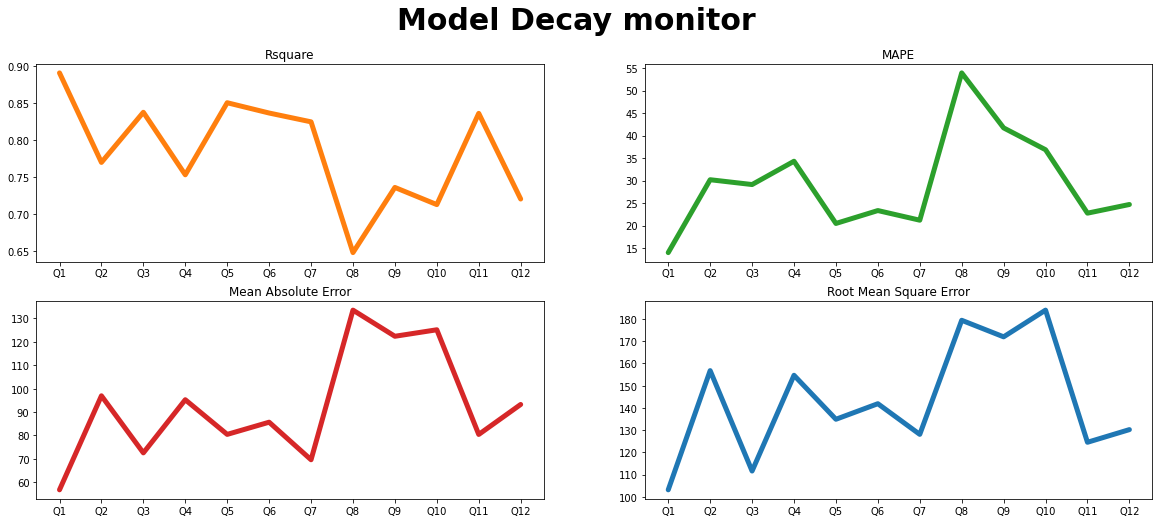

<Figure size 1440x3240 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ((ax1, ax2) ,(ax3, ax4)) = plt.subplots(2, 2,figsize=(20, 8))

plt.figure(figsize=(20,45))
#, (ax3, ax4)
sns.set_palette(sns.light_palette("black", reverse=True))
fig.suptitle('Model Decay monitor',fontweight="bold", size=30)
sns.set_style('darkgrid')
ax1.plot(ev['Period'],ev['Rsquare'],'tab:orange',linewidth=5)
ax2.plot(ev['Period'],ev['MAPE'],'tab:green',linewidth=5)
ax3.plot(ev['Period'],ev['Mean Absolute Error'],'tab:red',linewidth=5)
ax4.plot(ev['Period'],ev['Root Mean Square Error'],'tab:blue',linewidth=5)
ax1.title.set_text('Rsquare')
ax2.title.set_text('MAPE')
ax3.title.set_text('Mean Absolute Error')
ax4.title.set_text('Root Mean Square Error')
plt.savefig("output-1.jpg")